# How to plot a RNA-Seq converage from tabulated files (e.g., from bedTools) and carry out a statistical test on the activation/repression of genes depending on their genomic context 

Please use the next cell to adjust the two following variables according to your installation: 
- path to GRATIOSA package
- path to database

In [1]:
import sys
## PATH TO PACKAGE:
## ----------------
## IF ALREADY IN YOUR PYTHON PATH (e.g. installation through Pip): nothing to do
## IF NOT IN YOUR PYTHON PATH (e.g. download from GitHub): 
## uncomment and adjust the following relevant line to the location of the GRATIOSA directory
## - For Linux/MacOS:             typical style ;-)
#sys.path.append('/home/usr/Python_venv/lib/python3.8/site-packages/') 
# sys.path.insert(0,"/home/s/Téléchargements/GRATIOSA-master/")
#sys.path.append("/home/s/Downloads/GRATIOSA-master/")
## (- For Windows:                  typical style ;-)
#sys.path.append('C:\\Downloads\\GRATIOSA-master')


import os
## PATH TO DATABASE:
## -----------------
## FOR REGULAR USE OF THE PACKAGE:
##  Please set your system environment variable \$GRATIOSA_DB_PATH in order to have 
##  \$GRATIOSA_DB_PATH + data/organisms (e.g. export GRATIOSA_DB_PATH=/home/usr/documents/GRATIOSA/).
## FOR THIS TUTORIAL ONLY:
##  you can skip the system environment variable and just use the following line
##  We assume that the "data" directory containing the database is in the parent directory (otherwise adjust line)
os.environ["GRATIOSA_DB_PATH"]=os.getcwd()+"/../"
print("Please check that the database is stored in: %s"%(os.environ["GRATIOSA_DB_PATH"]))

Please check that the database is stored in: /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../


In [2]:
# Loading the modules for data loading
from GRATIOSA import Genome, Transcriptome

# Loading the statistical analysis and graphic modules
from GRATIOSA import stat_analysis, plot_stat_analysis, plot_genome
import numpy as np

## 1 - Data loading
#### Genomic annotation loading

In [3]:
g = Genome.Genome("ecoli")
g.load_annotation()

Detected a genome with 1 chromosome
Chromosome U00096.3 of length 4641652
Sequence of organism ecoli loaded
Trying to load annotation from: /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../data/ecoli/annotation/sequence.gff3
Annotation of ecoli loaded
Number of genes: 4314


#### Transcriptome signal and fold-changes loading

In [4]:
# Initialization of the Transcriptome object
tr = Transcriptome.Transcriptome(g)

In [11]:
# Loading RNA-Seq coverages
# The first execution is longer because the code reads the wig text files with RNA-Seq coverage 
# for dataset GEO GSM2771004 (cold-shock)
# and replaces it with .npz Python coverage files for faster subsequent loading
tr.load_rnaseq_cov()
# This was requested because the cov_txt.info file contained the list of .wig files.
# You can check that the operation worked by comparing the new files cov.info and .npz files
# with the content of the npz_check directory in data/ecoli/rnaseq_cov/
# after this initial step, you can delete the .wig files if you wish, as the .npz files contain the same information
# The cov_txt.info should now be empty after the header line. 

Reading the coverage data from text file /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../data/ecoli/rnaseq_cov/cov_txt.info
Loading condition WT
Loading condition cold_shock_10mn


## 2 - Genomic plot 

Plots the RNA-Seq coverage in a chosen location, for the two RNA-Seq coverage datasets that we loaded

Saved as /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../resdir/Genome_plot/genomic_plot_coli.pdf


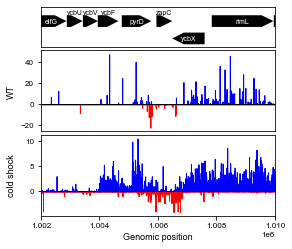

In [12]:
plot_genome.plot_region(g,beg=1002000,end = 1010000, 
                        RNASeq_cond=["WT","cold_shock_10mn"],
                        R_ylabels=["WT","cold shock"],
                        hspace=0.05,
                        figsize=(5,3.5),
                        output_file=f"genomic_plot_coli",
                        file_extension='.pdf',
                        tr_object=tr
                       )

See the function description for arguments selection:

In [7]:
help(plot_genome.plot_region)

Help on function plot_region in module GRATIOSA.plot_genome:

plot_region(gen, beg, end, RNASeq_cond=[], signals_cond=[], gene_names=True, output_dir='/home/s/GRATIOSA/tutorials/../resdir/Genome_plot/', output_file='Genome_2024-01-10 22:07:31.708943', file_extension='.pdf', *args, **kwargs)
    Plots experimental information (one subplot per experiment) and gene
    annotations for a region. The genes annotation subplot is created with
    the subplot_genes function. RNASeq subplots and Chipseq subplots
    are created with the subplot_rnaseq_coverage and subplot_signal functions
    respectively.
    
    Args:
        gen: Genome instance
        beg (int.): beginning of the region to be plotted
        end (int.): end of the region to be plotted
        RNASeq_cond (list of str.): list of the RNASeq conditions names to
            represent. Left empty by default ie no cover is plotted.
        tr_object (Transcriptome instance): Transcriptome instance with 
            loaded RNASe

# 3 - Test the relation between fold-change and gene orientation

In [13]:
# Loading RNA-Seq fold-change values from different datasets: 
# - Peter et al. 2004 Novobiocin treatment
# - Blot et al. 2006 Novobiocin treatment
# - Cold shock 10 and 30 min (see above, https://doi.org/10.1016/j.molcel.2018.02.035)
# - Osmotic and other shocks (https://doi.org/10.1098/rsta.2015.0069)
tr.load_fc_pval()
# this generates a lot of warnings
# the data are heterogeneous, were obtained with different microarray probes
# as a result, some "newer" datasets have values for more genes, and some p-values are missing
# it is easier with RNA-Seq data, but we show this as an example

Loading condition: Blot
	29 locus are not in annotation
Loading condition: Peter
	260 locus are not in annotation
Loading condition: osmotic
No p-value column found in fc.info file
	100 locus are not in annotation
Loading condition: heat
No p-value column found in fc.info file
	100 locus are not in annotation
Loading condition: cold_shock_table10
No p-value column found in fc.info file
	240 locus are not in annotation
Loading condition: cold_shock_table30
No p-value column found in fc.info file
	240 locus are not in annotation


In [14]:
# Look at a few genes
# -------------------
# List of gene ids with experimental value in a specific dataset
print(tr.genes_valid_fc["Blot"][:10])
print("-------------")
# A few example of the data: 
# one value per dataset: log2-fold-change and associated p-value
# note that some datasets were imported from supplementary data with missing p-values (assigned to 0). 
for gene in tr.genes_valid_fc["Blot"][:3]:
    print(gene,tr.genes[gene].fc_pval)

['b0463', 'b4117', 'b0474', 'b2000', 'b0049', 'b0978', 'b0469', 'b2923', 'b3237', 'b0908']
-------------
b0463 {'Blot': (-0.6647454347589391, 0.0443), 'Peter': (nan, nan), 'osmotic': (-0.451675533132837, 0.0), 'heat': (-0.067430577074264, 0.0), 'cold_shock_table10': (0.20144202617955476, 0.0), 'cold_shock_table30': (0.1306689517661742, 0.0)}
b4117 {'Blot': (0.6454249887072632, 0.0083), 'Peter': (-0.9159, 1.0), 'osmotic': (-0.175445658483895, 0.0), 'heat': (-1.18423976851509, 0.0), 'cold_shock_table10': (0.16476065673761175, 0.0), 'cold_shock_table30': (0.5225049309689458, 0.0)}
b0474 {'Blot': (-0.7836382650288727, 0.0178), 'Peter': (-0.2515, 0.825375), 'osmotic': (-1.10491207155466, 0.0), 'heat': (-1.30089975703575, 0.0), 'cold_shock_table10': (-0.021238796374338977, 0.0), 'cold_shock_table30': (-0.030437733220803623, 0.0)}


In [15]:
# Add an orientation attribute to each gene, depending on its neighbors
# This is an attribute of the Genome object
g.load_gene_orientation()

Operation load_neighbor_all completed for genome ecoli
Operation load_gene_orientation completed for genome ecoli


In [16]:
# example
g.genes["b2000"].orientation

'tandem'

In [17]:
# Define categories of activated, repressed or non-affected genes for each condition
# This is an attribute of the Tr object (transcriptome)
# We use the default values of the function (p-value=0.05)
tr.compute_state_from_fc()

In [18]:
# Check the resulting transcriptional "state" for an example gene
tr.genes["b2000"].state

{'Blot': 'act',
 'Peter': 'non',
 'osmotic': 'rep',
 'heat': 'rep',
 'cold_shock_table10': 'rep',
 'cold_shock_table30': 'rep'}

In [19]:
# define dictionaries for the proportion test: 
# first create the dict containing the orientation of each gene
dict_ori=dict([("tandem",[]),("divergent",[]),("convergent",[]),("isolated",[])])
for gene in g.genes.keys():
    dict_ori[g.genes[gene].orientation].append(gene)
# then the dict with the transcriptional response to novobiocin of each gene
dict_response=dict([("act",[]),("rep",[]),("non",[])])
for gene in tr.genes_valid_fc["Blot"]:
    dict_response[tr.genes[gene].state["Blot"]].append(gene)

convergent: 99 elements
divergent: 151 elements
Two-sided test p-value between convergent and divergent	0.03575917961319633

Results saved in /home/s/maiwenn_PhD/article_GRATIOSA/revision/tutorials/../resdir/proportion_test/prop_test2024-06-11 16:47:01.104650


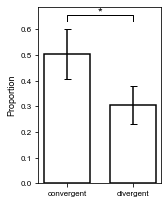

In [20]:
# plot and check the statistical significance of 
# the proportion of activated genes (among act+rep, i.e., among differentially expressed genes)
# in the divergent versus convergent sets
plot_stat_analysis.plot_proportion_test(dict_ori,dict_response,targ_features=["act"],all_features=["act","rep"],cats=["convergent","divergent"],alt_hyp="two-sided",figsize=(2.5,3))
# We see that convergent genes are significantly more activated than divergent ones by novobiocin!  
# Find more details in the exported text file